# JEU DE DONNEES CREDIT RISK

## EXPLORATION DES DONNEES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset='7-credit_risk_dataset.csv'


In [ ]:
df = pd.read_csv(dataset)

In [ ]:
#affichage des 5 premieres lignes du dataset
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
#preciser la variable cible
cible='loan_status'

In [ ]:
#selectionner
df1= df.drop(cible, axis=1)
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [ ]:
#selection des variables categorielles
categorial_data=df1.select_dtypes('object')
#selection des variables numeriques
numerical_data=df1.select_dtypes(['float','int'])



### analyse de la forme des données

In [ ]:
#taille des differentes categories
print("nous avons ",categorial_data.shape[1],"donnee(s) categorielles(s)")
print("nous avons ",numerical_data.shape[1],"donnee(s) numerique(s)")


nous avons  4 donnee(s) categorielles(s)
nous avons  7 donnee(s) numerique(s)


In [ ]:
# df.dtypes.value_counts

In [ ]:
# df.value_counts()

In [ ]:
# df.dtypes.value_counts().plot.pie()

In [ ]:
#remplacement des valeurs manquantes

#valeurs manquantes numeriques

for colums in numerical_data.columns:
  numerical_data[colums].fillna(numerical_data[colums].mean())

#valeurs manquantes categorielles
for colums in categorial_data.columns:
  categorial_data[colums].fillna(categorial_data[colums].mode())



In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: >

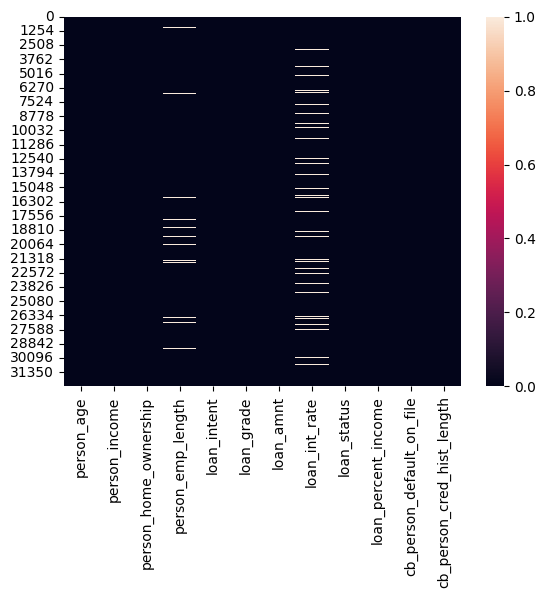

In [ ]:
sns.heatmap(df.isna())

In [ ]:
#normalisation des donnees
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# numerical_data_scaler=scaler.transform(numerical_data)

In [ ]:
# #encodage des donnees
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(categorial_data)
# categorial_data_scaler=le.transform(categorial_data)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
person_emp_length             0.027470
loan_int_rate                 0.095639
dtype: float64

### remplacement des valeurs manquantes

### examen de la colonne cible

In [ ]:
df[cible].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### histogramme des valeurs continues

<Figure size 640x480 with 0 Axes>

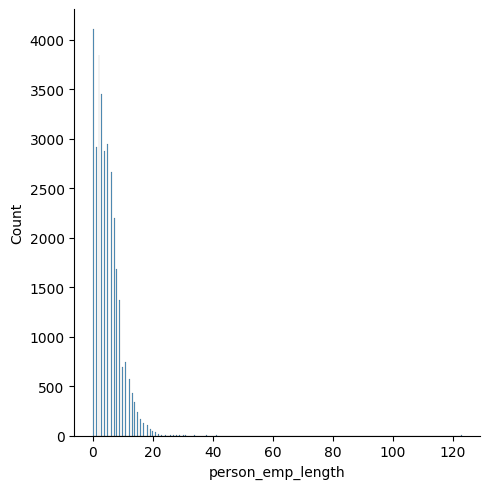

<Figure size 640x480 with 0 Axes>

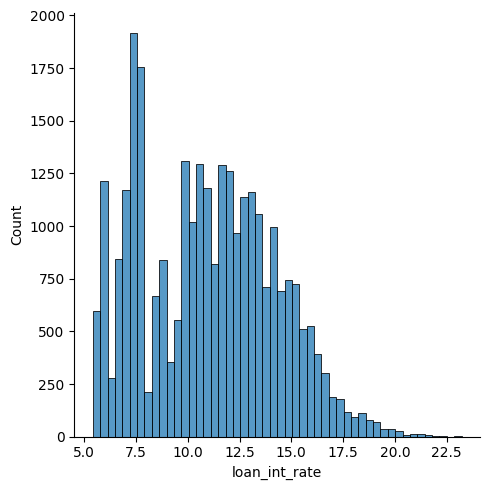

<Figure size 640x480 with 0 Axes>

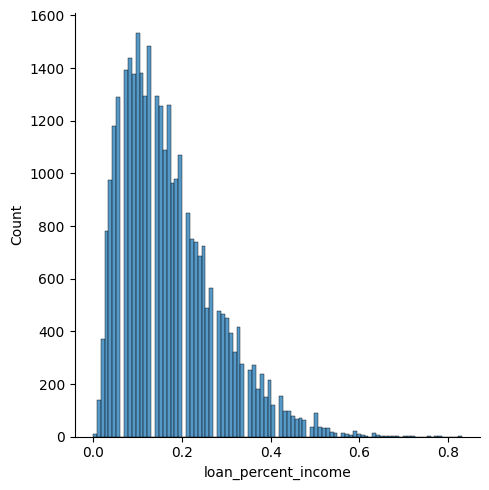

In [ ]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.displot(df[col])

### variables Qualitatives

In [ ]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50} {df[col].unique()}')

person_home_ownership----------------------------- ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent--------------------------------------- ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade---------------------------------------- ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file------------------------- ['Y' 'N']


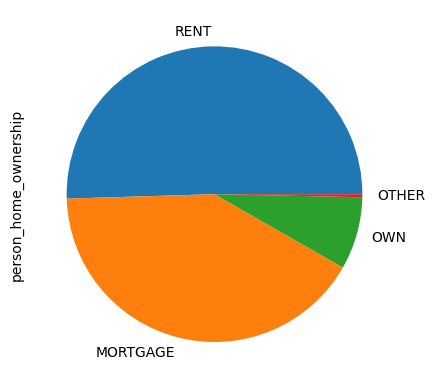

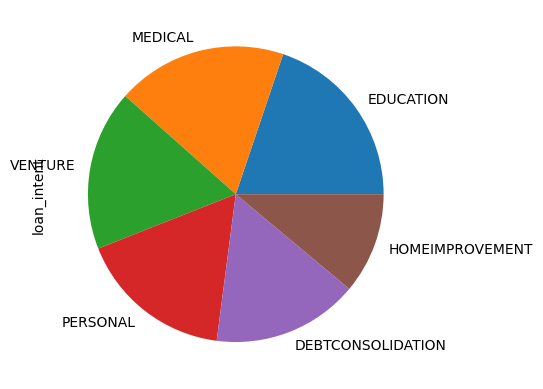

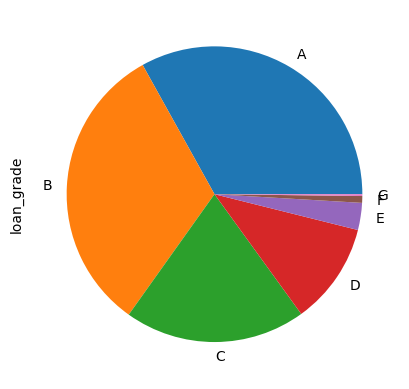

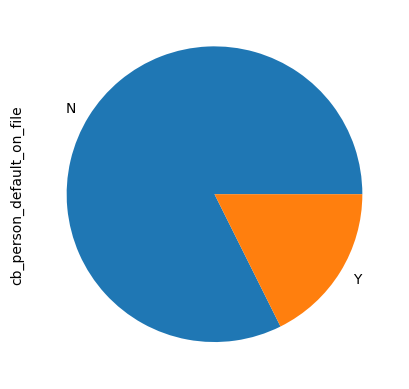

In [ ]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()

### relations entre les variables et la cible

In [ ]:
positive_df = df[df[cible] == 1]
negative_df = df[df[cible] == 0]

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64

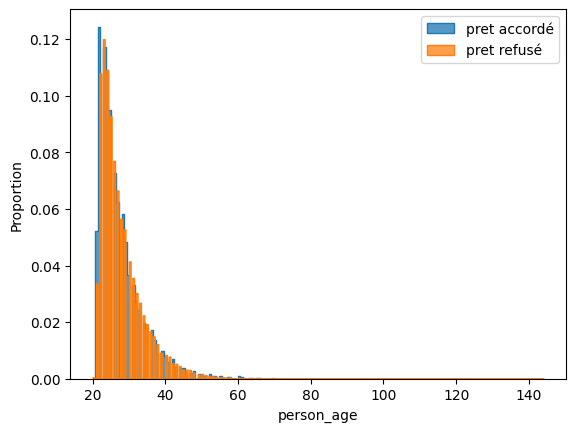

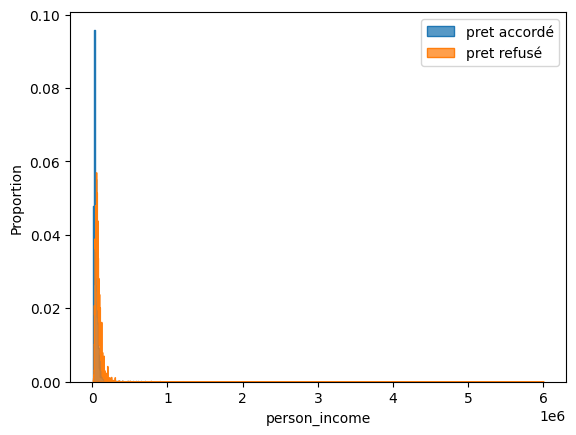

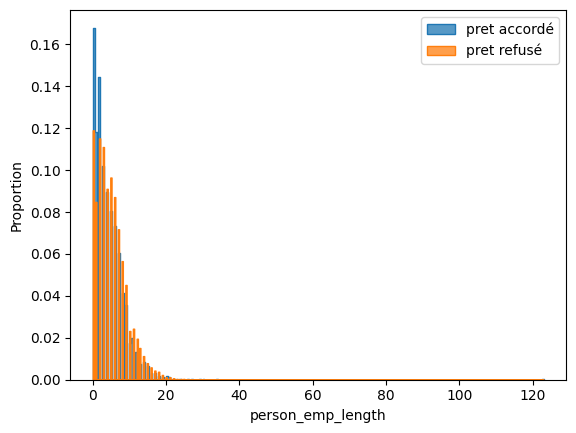

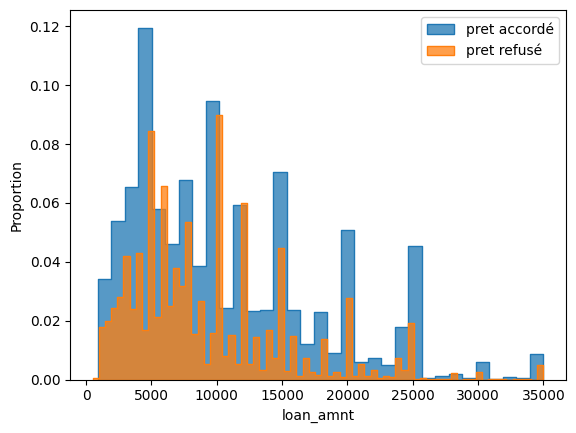

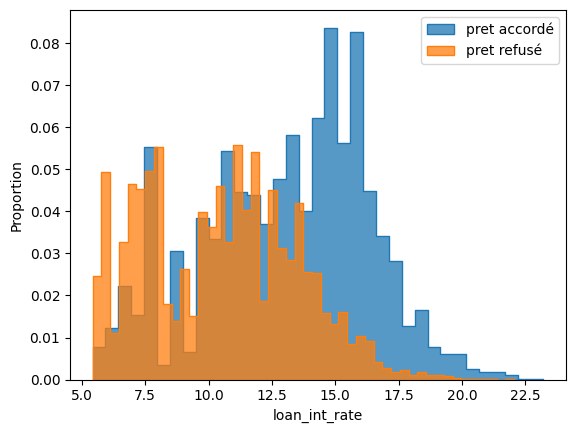

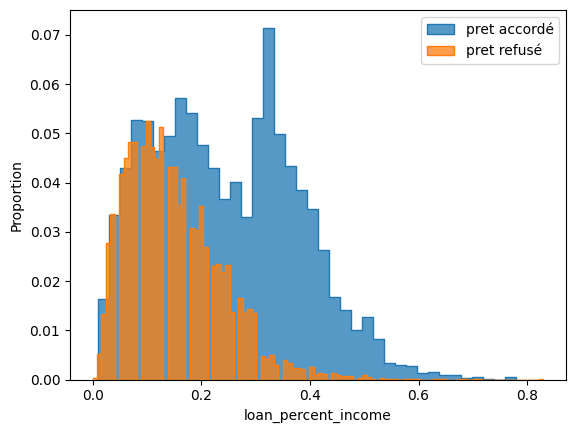

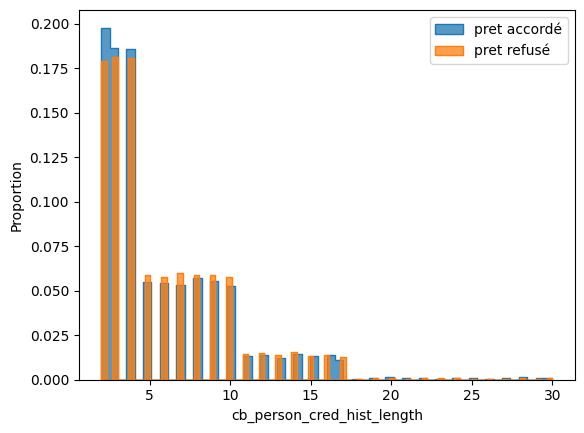

In [ ]:
liste = ['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length' ]
for col in numerical_data.columns:
  plt.figure()
  sns.histplot(positive_df[col], label = 'pret accordé', stat = 'proportion', element = 'step')
  sns.histplot(negative_df[col], label = 'pret refusé',stat = 'proportion', element = 'step')
  plt.legend()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### relations Variables/ variables

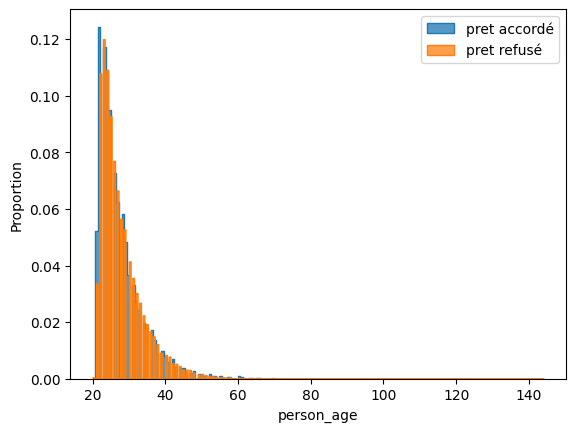

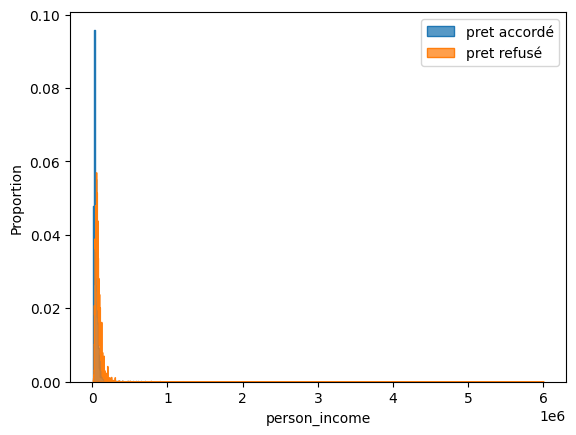

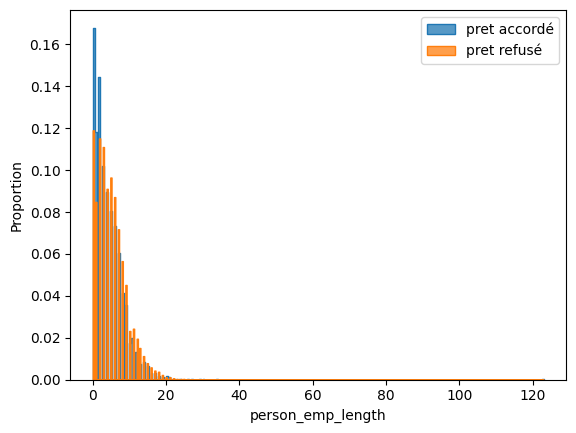

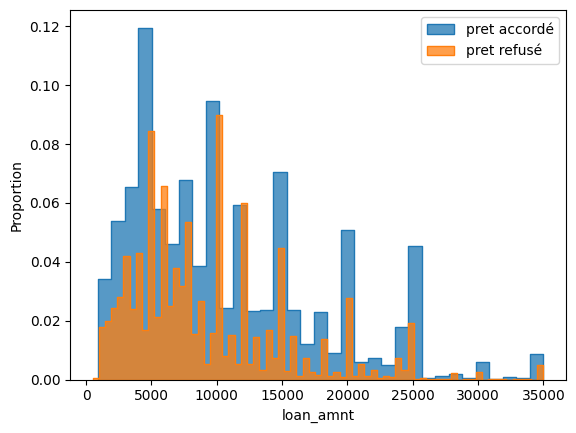

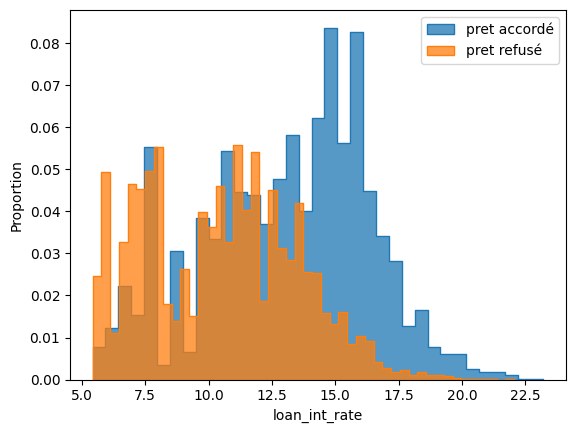

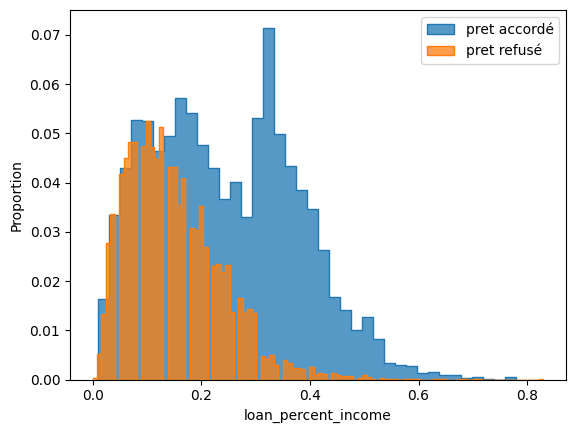

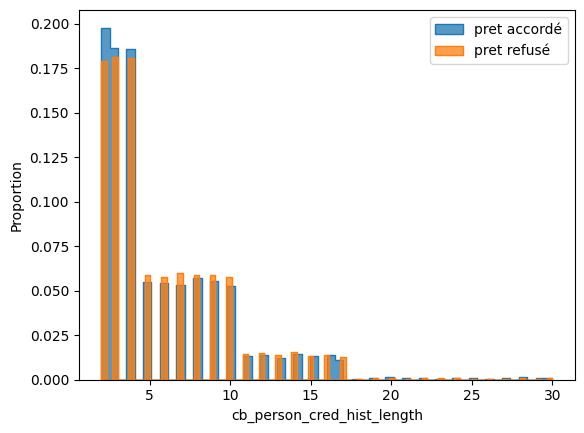

In [ ]:
liste = ['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length' ]
for col in numerical_data.columns:
  plt.figure()
  sns.histplot(positive_df[col], label = 'pret accordé', stat = 'proportion', element = 'step')
  sns.histplot(negative_df[col], label = 'pret refusé',stat = 'proportion', element = 'step')
  plt.legend()


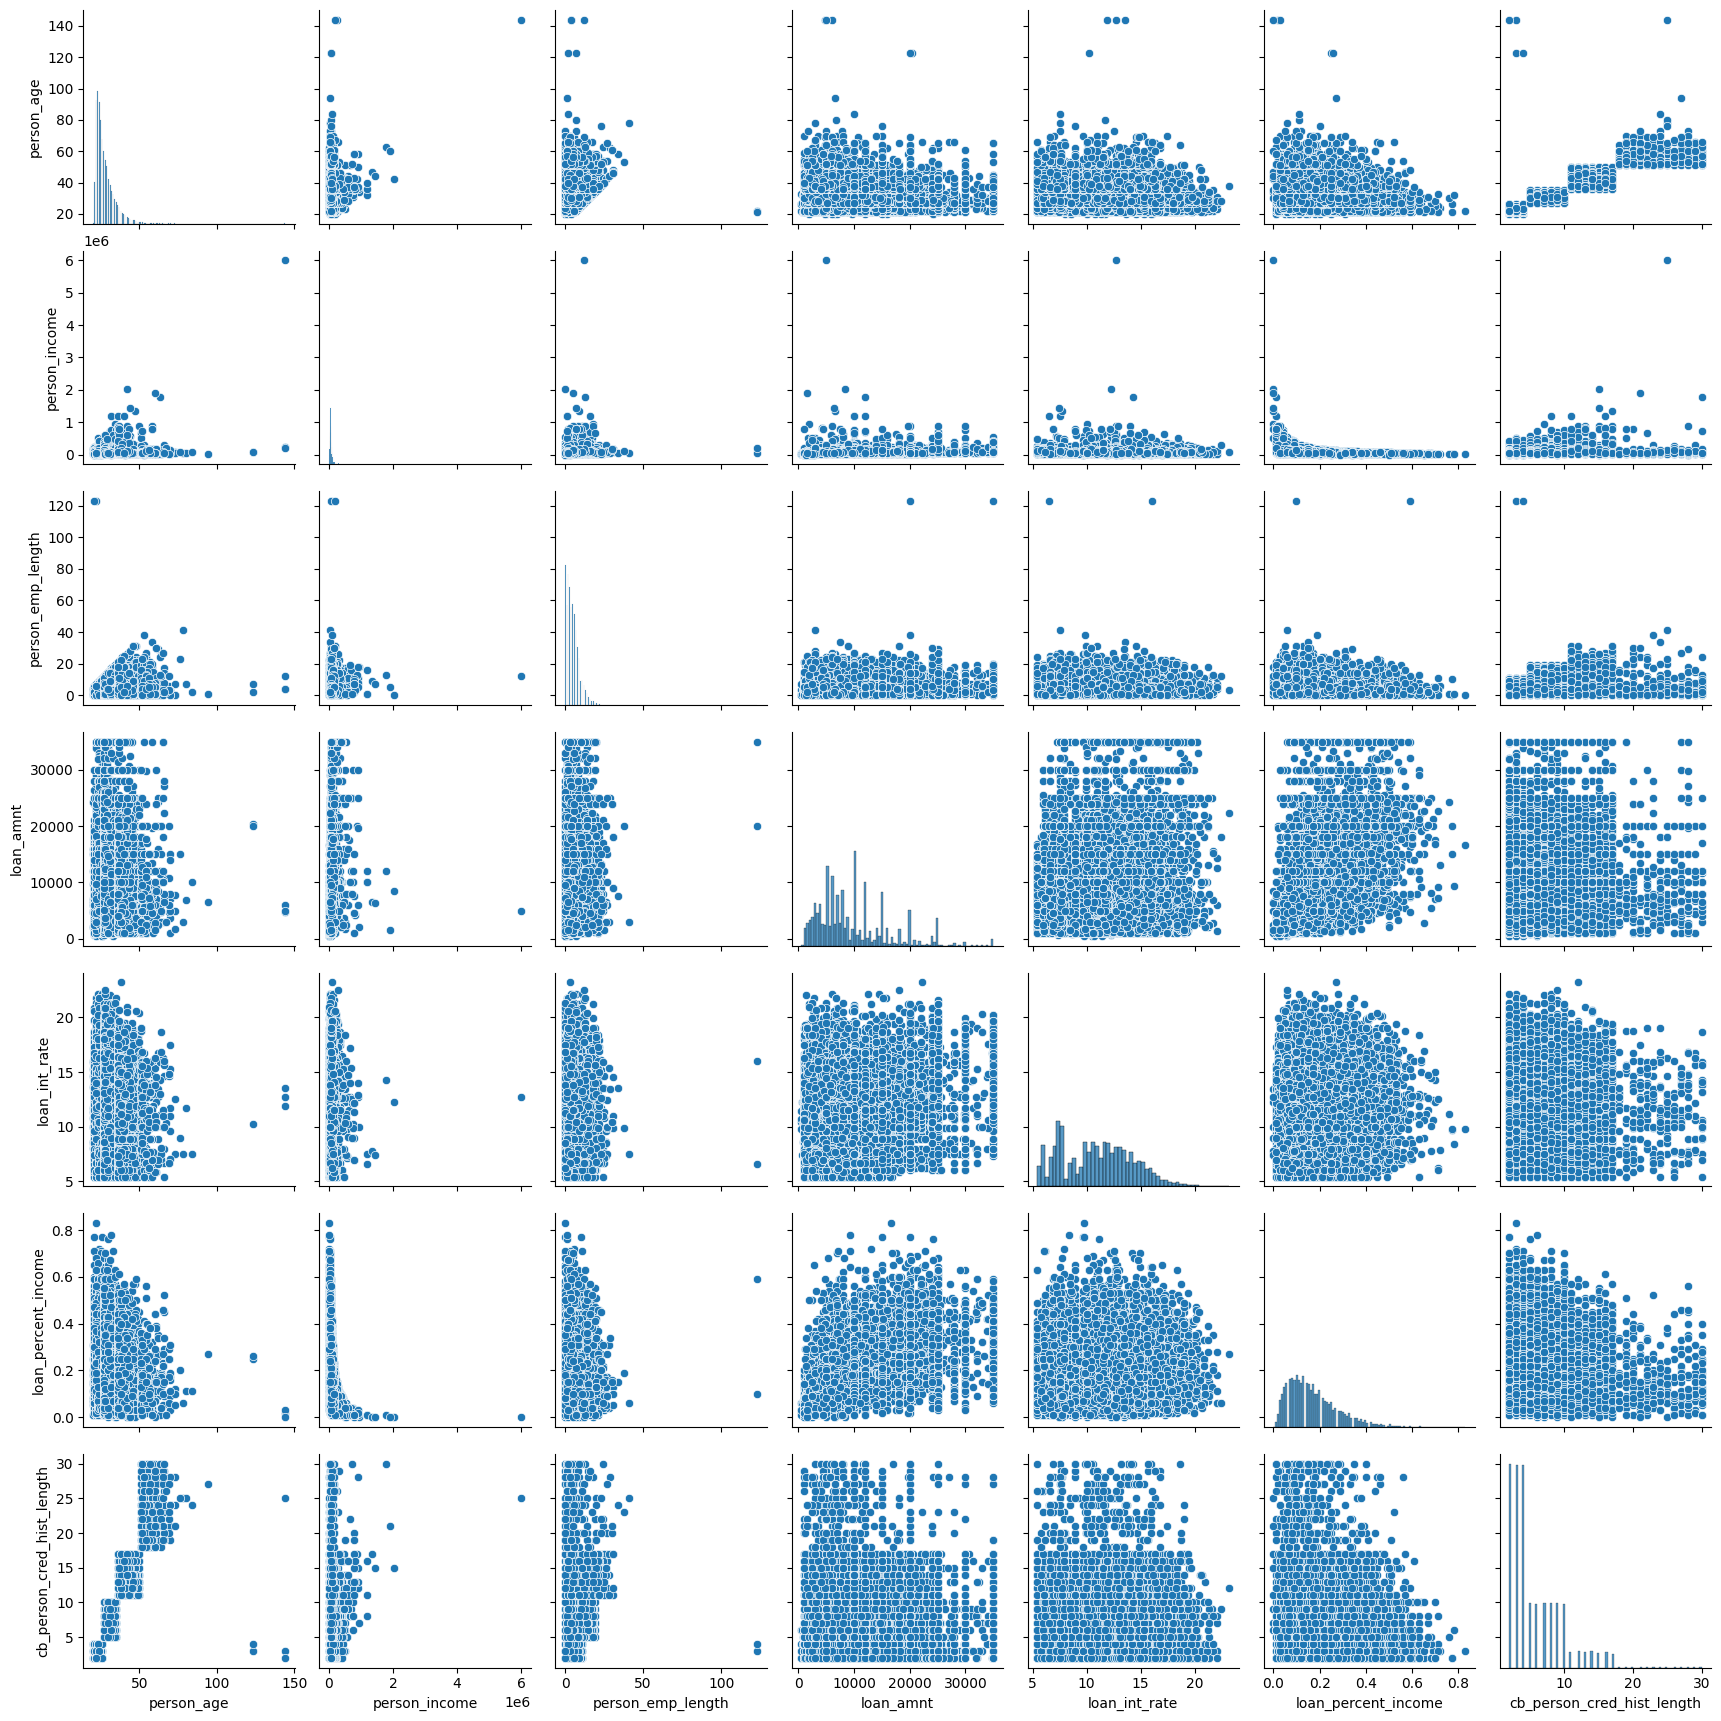

In [ ]:
df1 = df.drop(columns=cible)
sns.pairplot(df1)

<ipython-input-28-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

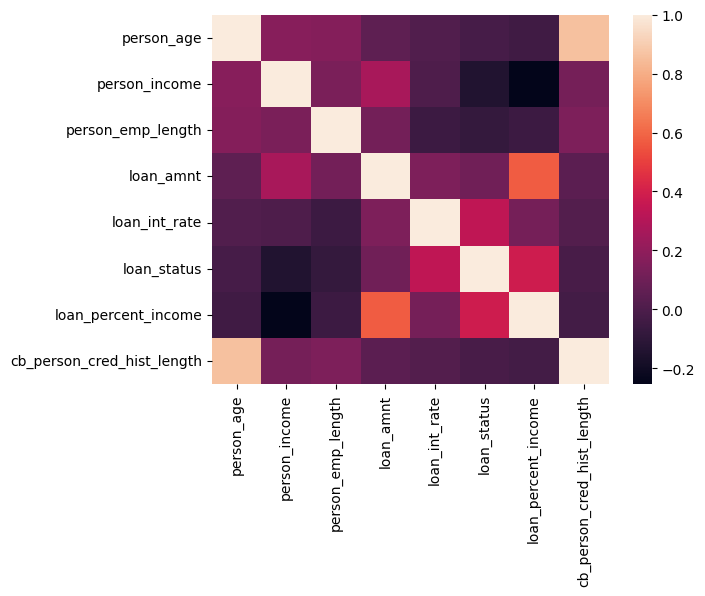

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()[cible].sort_values()

<ipython-input-29-dc3c13bf42c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[cible].sort_values()


person_income                -0.144449
person_emp_length            -0.082489
person_age                   -0.021629
cb_person_cred_hist_length   -0.015529
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_percent_income           0.379366
loan_status                   1.000000
Name: loan_status, dtype: float64

### encodage des données

In [ ]:
# for col in df.select_dtypes('object'):
#   print(f'{col :-<50} {df[col].unique()}')

In [ ]:
# def encodage(df):
#   code = {'RENT':0,
#           'OWN':1,
#           'MORTGAGE':2,
#           'OTHER':3,
#           'PERSONAL':0,
#           'EDUCATION':1,
#           'MEDICAL':2,
#           'VENTURE':3,
#           'HOMEIMPROVEMENT':4,
#           'A':0,
#           'B':1,
#           'C':2,
#           'D':3,
#           'E':4,
#           'F':5,
#           'G':6,
#           'Y':1,
#           'N':0}
#   for col in df.select_dtypes('object').columns:
#     df.loc[:,col] = df[col].map(code)
#   return df


In [ ]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object>

In [ ]:
# df = encodage(df)

### division du jeu de données

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainset, testset  = train_test_split(df, test_size=0.25, random_state = 0)

trainset.interpolate(method ='linear', limit_direction ='backward', inplace=True)
testset.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [ ]:
x_train = trainset.drop(cible, axis=1)
x_test =  testset.drop(cible, axis=1)
y_train = trainset[cible]
y_test =  testset[cible]

# Implémentation des différents modèles de classification

## 1- les arbres de décsion

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
  model.fit(x_train,y_train)
  ypred = model.predict(x_test)

  print(confusion_matrix(y_test,ypred))
  print(classification_report(y_test,ypred))

In [ ]:
evaluation(model)

ValueError: ignored

In [ ]:
N, train_score, val_score = learning_curve(model, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
from xgboost import XGBClassifier
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

In [ ]:
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
from xgboost import XGBClassifier
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.8, objective='binary:logistic')
# fit model
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
# from xgboost import XGBClassifier
# # create model instance
# bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.65, objective='binary:logistic')
# # fit model
# bst.fit(x_train, y_train)
# # make predictions
# preds = bst.predict(x_test)
# print(confusion_matrix(y_test,preds))
# print(classification_report(y_test,preds))
# N, train_score, val_score = learning_curve(bst, x_train, y_train)
# plt.figure()
# plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
# plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
# plt.legend()

#implementation des svm

In [ ]:

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = "rbf"))
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='scale', kernel = "rbf", cache_size = 500))
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = "sigmoid"))
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

#implementation de la regression logistique

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
model_lg_acc_pred=model_lg.predict(x_test)
model_lg_acc = cross_val_score(estimator=model_lg, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_lg_acc

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model de regression logistique:")
cm = confusion_matrix(y_test, model_lg_acc_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

#implementation de random forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model_randomf = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
# Fit on training data
model.fit(x_train, x_test)
model_randomf_pred=model_randomf.predict(x_test)
model_randomf_acc = cross_val_score(estimator=model_randomf, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_randomf_acc

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model de random forest:")
cm = confusion_matrix(y_test, model_randomf_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

#optimisation des modeles

In [ ]:
#optimisation des modeles
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
parameters = {"alpha": [1, 10, 100, 290, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             }
grid = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
reg.score(x_test,y_test)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
print(distributions)
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_


In [ ]:
import time
start = time.time()
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=42)
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,5,7,10],
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtclf, param_grid=hyperparameter_space,
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(x_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(x_train, y_train)
y_pred = gs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print()

In [ ]:
from sklearn.metrics import accuracy_score
# Let's measure execution time too
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=42)
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20],
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(x_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(x_train, y_train)
y_pred = rs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()